In [1]:
import pandas as pd
import numpy as np

twitter_df=pd.read_csv('twitter-archive-enhanced.csv')

In [22]:
print twitter_df.head(2)

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/89242

In [65]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [2]:
import requests

predictions=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [3]:
predictions.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [4]:
open('image_predictions.csv','wb').write(predictions.content)

In [5]:
prediction_df=pd.read_csv('image_predictions.csv',sep='\t',error_bad_lines=False)

In [ ]:
import tweepy

consumer_key = '0ef9ZN1lehgc3G4rh0SQvyYZA'
consumer_secret = '6dA51cggFj5XqbFLG9PvFGfSYhPUHSQQyHkJnK7ddaFtkP3O6q'
access_token = 'sHB4eFlSsid2HhjDo16qQRMSvCaoTE'
access_secret = 'yXIRsIeo3xkWXzLobFLiPLjZMXNfmF8dHgu9HGd9LK01e'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
import json
tweets=[]
for line in open('tweet_json.txt','r'):
    try:
        tweets.append(json.loads(line))
    except ValueError:
        pass

In [30]:
len(tweets)

2340

In [63]:
print tweets.head(1)

  contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   

                                            entities  \
0  {u'symbols': [], u'user_mentions': [], u'hasht...   

                                   extended_entities  favorite_count  \
0  {u'media': [{u'expanded_url': u'https://twitte...           38256   

   favorited                                          full_text   geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None   

                         ...                          quoted_status  \
0                        ...                                    NaN   

  quoted_status_id quoted_status_id_str  quoted_status_permalink  \
0              NaN                  NaN                      NaN   

  retweet_count  retweeted retweeted_status  \
0          8380      False              NaN   

                                              source trun

In [7]:
import pandas as pd

tweets=pd.DataFrame(tweets)

In [32]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2066 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

I join the twitter_df table with the tweets table. I use a left join, so that all the rows in twitter_df are preserved, but the tweet_ids that are not in twitter_df are removed. I only added the following columns from tweets: 'retweet_count','favorite_count','entities'.

In [104]:
temporary_df=tweets[['id','retweet_count','favorite_count','entities']]
tweet_df=twitter_df.join(temporary_df.set_index('id'), on='tweet_id')

In [105]:
tweet_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,entities
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8380.0,38256.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6188.0,32795.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4093.0,24696.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."


In [69]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

There are 16 rows where the newly added columns are null. These are tweet_ids that appear in the twitter_df data frame but did not appear in the tweets data frame. Let's look at them:

In [36]:
tweet_df[tweet_df['retweet_count'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,entities
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None,NaN,NaN,NaN
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None,NaN,NaN,NaN
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None,NaN,NaN,NaN
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None,NaN,NaN,NaN
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None,NaN,NaN,NaN


It looks like all of these tweets occured at around the same time (and the dogs are not named). *But I'll leave this data as is, since there is no clear indication it is corrupted in some obvious way.* 

I want to take a closer look at the `text` column, and at the `expanded_urls` column.

In [16]:
for i in range(0,100):
    print tweet_df.loc[i,'text']
    print tweet_df.loc[i,'expanded_urls']
    print ""

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
https://twitter.com/dog_rates/status/892420643555336193/photo/1

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
https://twitter.com/dog_rates/status/892177421306343426/photo/1

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
https://twitter.com/dog_rates/status/891815181378084864/photo/1

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
https://twitter.com/dog_rates/status/891689557279858688/photo/1

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
https://twitter.com/dog_rates/status/89132755892668825

It looks like there are some retweets and replies in the data. The retweets' `text` column starts with 'RT' and the replies starts with '@'. I remove these rows from the table. (**QUALITY ISSUE \#1**)

I will also remove rows without an image, by removing rows where `expanded_urls` is nan. (**QUALITY ISSUE \#2**)

In [143]:
import re

for i in tweet_df.index:
    condition=(re.search("^RT",tweet_df.loc[i,'text']) is not None) or (re.search("^@",tweet_df.loc[i,'text']) is not None)
    if condition:
        tweet_df.drop(i, axis=0,inplace=True)
        
tweet_df.dropna(axis=0,subset=['expanded_urls'],inplace=True)

In [144]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2115 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null object
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2115 non-null int64
rating_denominator            2115 non-null int64
name                          2115 non-null object
doggo                         2115 non-null object
floofer                       2115 non-null object
pupper                        2115 non-null object
puppo                         2115 non-null object
retweet_count                 2112 non

The `retweet_count` and `favorite_count` columns are float. I'll cast them as integer (**QUALITY ISSUE \#3**)

The `tweet_id` is also float, but this shouldn't be a number at all, since it functions more like a name. Therefore I'll cast it as a string.  (**QUALITY ISSUE \#4**)

In [10]:
tweet_df['retweet_count']=tweet_df['retweet_count'].fillna(0.0).astype(int)

tweet_df['favorite_count']=tweet_df['favorite_count'].fillna(0.0).astype(int)

tweet_df['tweet_id']=tweet_df['tweet_id'].fillna(0.0).astype(str)

Let's look next at dog names. First I'll check to see how many dogs have no name. Second, it's likely that having used a regular expression to extract dog names might have selected also some words that are not dog names - so I'll check for 'names' that start with a lower-case letter.

In [40]:
tweet_df[tweet_df['name']=='None']['name'].count()

620

In [41]:
tweet_df[tweet_df['name'].str.islower()]['name'].count()

104

Let's see some of the entries where the dog names start with lower case. I'll print the `text` and `name` columns for each:

In [ ]:
for i in tweet_df[tweet_df['name'].str.islower()].index:
    print tweet_df.loc[i,'text']
    print tweet_df.loc[i,'name']
    print ''

It looks like the regex used picked up the first word after 'This is' or 'Here is' and so on. In many of these cases, the `text` column doesn't contain any name whatsoever, so the `name` column should be empty. However, in some of these cases, the `text` column does contain a dog name. I'll try to build some regular expressions to capture the names, and for the rest I will just replace `name` value with 'None'. **QUALITY ISSUE \#5**

In [11]:
import re

test=tweet_df[tweet_df['name'].str.islower()]
for i in test.index:
    if re.search("named\s[A-Z]\w*",test.loc[i,'text']) is not None:
        expression=re.search("named\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[1]
    elif re.search('That\sis\s[A-Z]\w*',test.loc[i,'text']) is not None:
        expression=re.search("That\sis\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[2]
    elif re.search('name\sis\s[A-Z]\w*',test.loc[i,'text']) is not None:
        expression=re.search("name\sis\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[2]
    else:
        test.loc[i,'name']=None
        
for i in test.index:
    tweet_df.loc[i,'name']=test.loc[i,'name']

C:\Users\BogdanR\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Next I look at the ratings. Although it's ok for the numerator to be higher than 10, the denominator should always be 10. Let's check:

In [ ]:
for i in tweet_df[tweet_df['rating_denominator']!=10].index:
    print tweet_df.loc[i,'rating_denominator']
    print tweet_df.loc[i,'text']
    print ''

There are three problems: first, when the denominator is 10\*n, that's a rating for n dogs. Second, when the denominator is different than that, the regex used picked the wrong ratio ('7/11' refers to the store, for example, and it's not a rating). Third, there are cases when even if the denominator is 10, the numerator is identified incorrectly: '7.26/10' is identified as having a numerator of value '26'.

To fix this column, I will address the above issues in reverse order: first I construct a regex that only picks ratios that have a multiple of 10 as denominator. Then, for the ones whose denominator is different than 10, I normalize them. **QUALITY ISSUE \#6**

In [243]:
for i in tweet_df.index:
    if re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']) is not None:
        tweet_df.loc[i,'rating_denominator']=int(re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[1])
        tweet_df.loc[i,'rating_numerator']=re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[0]
    elif re.search('\d+/\d0',tweet_df.loc[i,'text']) is not None:
        tweet_df.loc[i,'rating_denominator']=int(re.search('\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[1])
        tweet_df.loc[i,'rating_numerator']=re.search('\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[0]
    else:
        tweet_df.loc[i,'rating_denominator']=None
        tweet_df.loc[i,'rating_numerator']=None
    
for i in tweet_df[tweet_df['rating_denominator']!=10].index:
    try:
        if tweet_df.loc[i,'rating_denominator']!=None:
            old_denom=int(tweet_df.loc[i,'rating_denominator'])
            new_num=int(tweet_df.loc[i,'rating_numerator']*10)/old_denom
            tweet_df.loc[i,'rating_numerator']=new_num
            tweet_df.loc[i,'rating_denominator']=10
    except ValueError:
        pass


I take another look at the ratings, to make sure everything looks ok. In particular, I wonder if there are any ratings that are particularly low or particularly high.

In [13]:
for i in tweet_df.index:
    try:
        rating=float(tweet_df.loc[i,'rating_numerator']) / float(tweet_df.loc[i,'rating_denominator'])
    except ValueError:
        pass
    
    if (rating<.8 or rating>1.5):
        print tweet_df.loc[i,'text']
        print rating
        print ""

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
0.5

This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
0.6

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
0.0

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
7.5

Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
0.5

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
2.7

This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
0

There are more low scores than I was expecting, but it turns out most of these are not really dogs. In any case, the low scores are accurate, so I think the table captures the information in the `text` column correctly.

Next I change the `timestamp` column to a datetime format. (**QUALITY ISSUE \#7**)

In [276]:
tweet_df['timestamp']=pd.to_datetime(tweet_df['timestamp'])

Let's take a look at what is in the 'entities' column:

In [ ]:
tweet_df['entities'][0]

I will extract some data from the `entities` column. To begin with, I want to extract `hashtags`, `symbols`, `urls`, and `user_mentions`. I'll decide what to keep from these after I take a look at the data.

In [16]:
def value_to_string(value,dic):
    st=''
    for element in dic[value]:
        st+=str(element)
    return st

def update_df(value):
    i=0
    for i in range (0,tweet_df.shape[0]):
        try:
            tweet_df.loc[i,value]=value_to_string(value,tweet_df.loc[i,'entities'])
            i=i+1
        except TypeError: # entities column is nan
            pass
        except KeyError:
            tweet_df.loc[i,value]=' '
            
update_df('urls')
update_df('user_mentions')
update_df('hashtags')
update_df('symbols')

Let's look at what the `hashtags` column contains:

In [39]:
tweet_df[(tweet_df['hashtags'].notnull())&(tweet_df['hashtags']!='')].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,entities,hashtags,urls,user_mentions,symbols
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,9230.0,39762.0,"{u'symbols': [], u'user_mentions': [], u'hasht...","BarkWeek,",,,


It looks like the hashtag is buried a little deeper in the json structure, under the 'text' key. I want to keep this information, because I would like to see which hashtags are the most common. But before I do that I look at the other columns I created. Next is `symbols` column.

In [16]:
tweet_df[(tweet_df['symbols'].notnull())&(tweet_df['symbols']!='')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,created_at,favorite_count,entities,symbols


This column is empty so I discard it:

In [17]:
tweet_df.drop('symbols',axis=1,inplace=True)

Next I look at `url` column:

In [ ]:
tweet_df[(tweet_df['urls'].notnull())&(tweet_df['urls']!='')].head(1)

The text in the `url` column is truncated, so I just choose one cell to print:

In [42]:
tweet_df.loc[6,'urls']

"{u'url': u'https://t.co/Zr4hWfAs1H', u'indices': [117, 140], u'expanded_url': u'https://gofundme.com/ydvmve-surgery-for-jax', u'display_url': u'gofundme.com/ydvmve-surgery\\u2026'}"

I don't think I'll use this data, so I just remove the column.

In [18]:
tweet_df.drop('urls',axis=1,inplace=True)

Finally, I look at `user_mentions` column.

In [126]:
tweet_df[(tweet_df['user_mentions'].notnull())&(tweet_df['user_mentions']!='')]['user_mentions'].head(1)

29    {u'indices': [0, 12], u'screen_name': u'NonWhi...
Name: user_mentions, dtype: object

Again, I don't think i want to keep any of this data in my table. So I extract hashtags from the `hashtags` column (**QUALITY ISSUE \#8**)

In [112]:
def hashtag_to_string(dic):
    st=''
    if dic['hashtags']!=[]:
        for hashtag in dic['hashtags']:
            st+=str(hashtag['text'])+','
    return st
    
for i in range (0,tweet_df.shape[0]):
    try:
        tweet_df.loc[i,'hashtags']=hashtag_to_string(tweet_df.loc[i,'entities'])
        i=i+1
    except TypeError:
        print i
        pass
    except KeyError:
        tweet_df.loc[i,'hashtags']=' '

19
95
101
118
132
155
247
260
298
382
566
784
818
932
1698
2355


The `hashtags` column is not stored in a useful way - it's a string where each hashtag is separated from the next by a comma. I need to separate these hashtags, and then store each hashtag on a different row. I could either do this in the main dataframe (tweet_df) or I could just create an aditional hashtag dataframe. The main advantage if I go the second route is that I won't have duplicated tweet_ids in the main table, which rows will just repeat a lot of the same data (also, when doing visualizations, I will need to use a lot of group_by clauses if the data is all duplicated in this way). So I create an extra table (**TIDYING ISSUE \#1**) and then I drop the `entities` column from tweet_df.

In [126]:
hashtag_table=[]

for i in tweet_df[tweet_df['hashtags']!=' '].index:
    try:
        if pd.isnull(tweet_df.loc[i,'hashtags'])==False:
            hashtag_list=tweet_df.loc[i,'hashtags'].split(',')[0:-1]
            for i in range(len(hashtag_list)):
                hashtag_table.append({'tweet_id':str(tweet_df.loc[i,'tweet_id']),'hashtag':hashtag_list[i]})
    except ValueError:
        print i
hashtag_df=pd.DataFrame(hashtag_table)

tweet_df.drop('entities',axis=1,inplace=True)

The four columns that indicate dog stage are all instances of the same variable, namely dog stage. So we can collapse these into a single column. (**TIDYING ISSUE \#2**)

In [254]:
test_df=tweet_df[['tweet_id','doggo','floofer','pupper','puppo']]
melted=pd.melt(test_df,id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_stage')
dog_stage_df=melted[['tweet_id','dog_stage']]
dog_stage_df.head()

,tweet_id,dog_stage
0,892420643555336193,None
1,892177421306343426,None
2,891815181378084864,None
3,891689557279858688,None
4,891327558926688256,None


In [255]:
dog_stage_df.shape

(8460, 2)

In [256]:
dog_stage_df=dog_stage_df[dog_stage_df['dog_stage']!='None']
dog_stage_df.shape

(350, 2)

In [71]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

In [261]:
tweet_df=tweet_df.join(dog_stage_df.set_index('tweet_id'), on='tweet_id',how='left')
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,hashtags,grade,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,8380.0,38256.0,,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,6188.0,32795.0,,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,4093.0,24696.0,,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,8522.0,41579.0,,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,9230.0,39762.0,"BarkWeek,",1.2,NaN


In [257]:
tweet_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [258]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2115 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null object
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2109 non-null object
rating_denominator            2109 non-null float64
name                          2115 non-null object
retweet_count                 2112 non-null float64
favorite_count                2112 non-null float64
hashtags                      2112 non-null object
grade                         2109 non-null object
dtypes: float64(7), int64(1), obj

Let's also drop the three columns that have only null values. We can then saving the resulting clean(er) dataframe as a csv file.

In [259]:
tweet_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)
tweet_df.to_csv('twitter_archive_master.csv')

### Visualisations and Insights

I will know move on to a brief investigation of the dataset. Questions:
most common dog name
most retweeted?
most liked (favorited)?
most common hashtag?
highest grade?
is there a relationship between grade and retweet? grade and like? retweet and like? dog stage and grade? dog stage and like?
dates: what day of the week is the most common for posting? what time of the day? 

I look first at what is the most common dog name. 

In [ ]:
tweet_df[tweet_df['name']!='None']['name'].value_counts().head(10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import numpy as np
from numpy.polynomial.polynomial import polyfit


plt.figure(figsize=(12,8))
plt.hist(tweet_df['retweet_count'].dropna(),bins=100)
plt.title('Retweets')

In [ ]:
tweet_df.sort_values('retweet_count',ascending=False)['retweet_count'].head(30)

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['retweet_count'].dropna(),bins=500)
plt.xlim(0,20000)
plt.xticks(np.arange(0, 20000, 2000))
plt.title('Retweets')

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['favorite_count'].dropna(),bins=100)
plt.title('Likes')

In [ ]:
tweet_df.sort_values('favorite_count',ascending=False)['favorite_count'].head(30)

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['favorite_count'].dropna(),bins=500)
plt.xlim(0,50000)
plt.xticks(np.arange(0, 50000, 5000))
plt.title('Likes')

Next I want to see if there is a correlation between the number of likes a tweet has and the number of times it has been retweeted. I use a simple scatterplot for this:

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(tweet_df['retweet_count'],tweet_df['favorite_count'],alpha=.6)
plt.xlabel('Retweets')
plt.ylabel('Likes')

In [ ]:
small_df=tweet_df[tweet_df['retweet_count']<6000]
plt.figure(figsize=(12,8))
x=small_df['retweet_count']
y=small_df['favorite_count']
plt.scatter(x,y,alpha=.3)
plt.xlabel('Retweets')
plt.ylabel('Likes')

b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-',color='red')

In [127]:
hashtag_df['hashtag'].value_counts().head(10)

BarkWeek                 9
PrideMonth               4
ScienceMarch             1
BellLetsTalk             1
FinalFur                 1
NoDaysOff                1
LoveTwitter              1
K9VeteransDay            1
dogsatpollingstations    1
Canada150                1
Name: hashtag, dtype: int64

In [128]:
hashtag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
hashtag     29 non-null object
tweet_id    29 non-null object
dtypes: object(2)
memory usage: 536.0+ bytes


In [247]:
# tweet_df['rating_numerator']=tweet_df['rating_numerator'].astype(float)
# tweet_df['rating_denominator']=tweet_df['rating_denominator'].astype(float)

for i in tweet_df.index:
    if tweet_df.loc[i,'rating_numerator'] is not None:
        tweet_df.loc[i,'grade']=float(tweet_df.loc[i,'rating_numerator'])/int(tweet_df.loc[i,'rating_denominator'])
            
tweet_df.sort_values('grade',ascending=False)['grade'].head(30)
# tweet_df.loc[1351,:]

979     177.6
2074       42
395       1.4
199       1.4
35        1.4
76        1.4
209       1.4
41        1.4
418       1.4
866       1.4
164       1.4
490       1.4
347       1.4
426       1.4
436       1.4
339       1.4
404       1.4
56        1.4
758       1.4
1053      1.4
83        1.4
1609      1.4
187       1.4
1068      1.4
184       1.4
449       1.4
631       1.4
214       1.4
448       1.4
22        1.4
Name: grade, dtype: object

The highest grade is just a play on the Declaration of Independence year, and the second highest grade belong so Snoop Dog. So the highest authentic grades are 1.4, which seem to be pretty common. Let's see if there is any relationship between grades on the one hand, and retweets and likes on the other.

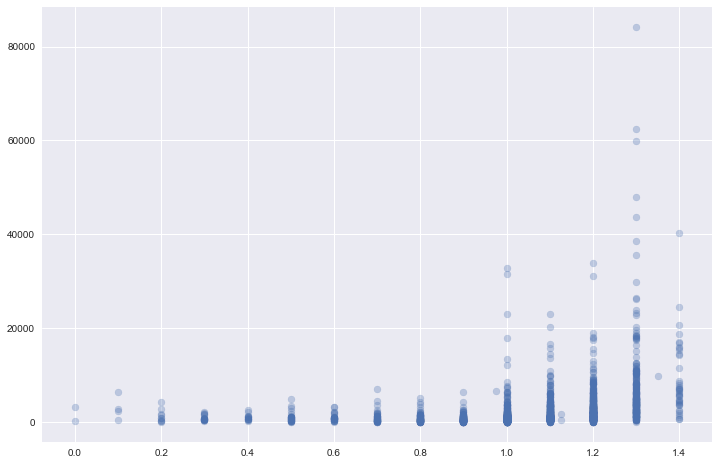

In [250]:
plt.figure(figsize=(12,8))
temp_df=tweet_df.drop([979,2074],axis=0)
plt.scatter(temp_df['grade'],temp_df['retweet_count'],alpha=.3)

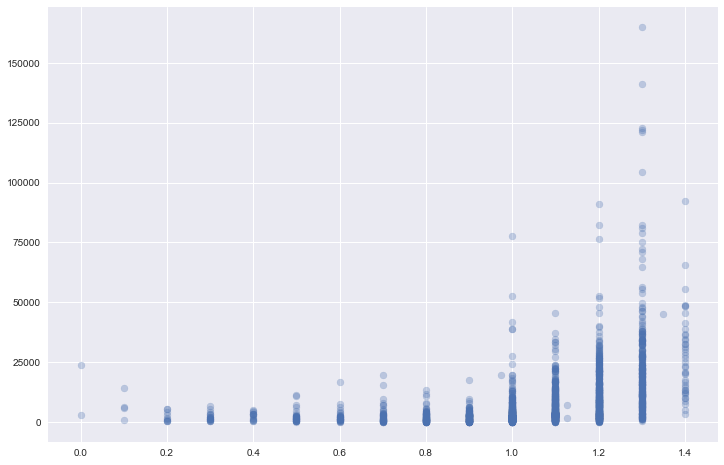

In [251]:
plt.figure(figsize=(12,8))
plt.scatter(temp_df['grade'],temp_df['favorite_count'],alpha=.3)

(0, 20000)

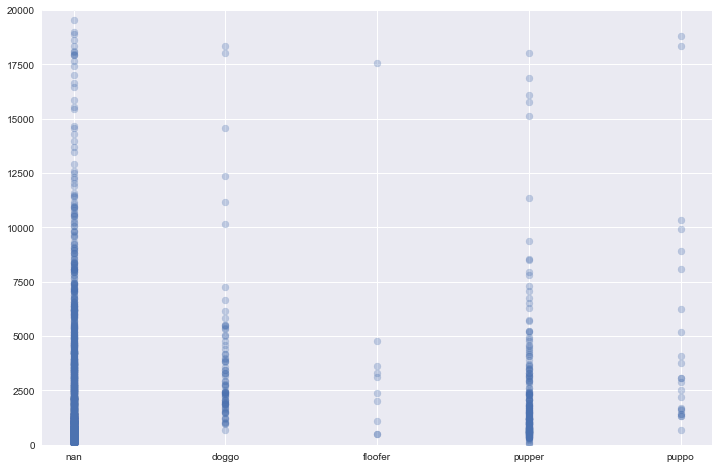

In [270]:
plt.figure(figsize=(12,8))
u, inv = np.unique(tweet_df["dog_stage"], return_inverse=True) 

plt.scatter(inv,tweet_df['retweet_count'],alpha=.3)
plt.xticks(range(len(u)),u)
plt.ylim((0,20000))

(0, 7500)

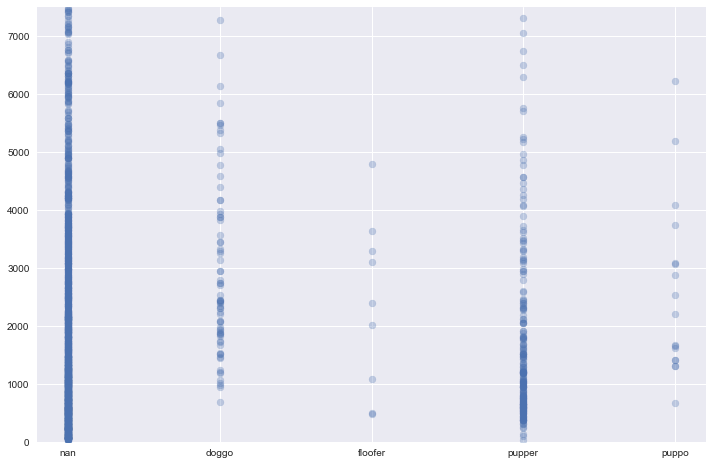

In [273]:
plt.figure(figsize=(12,8))
u, inv = np.unique(tweet_df["dog_stage"], return_inverse=True) 

plt.scatter(inv,tweet_df['retweet_count'],alpha=.3)
plt.xticks(range(len(u)),u)
plt.ylim((0,7500))

In [342]:
tweet_df['month_sent']=tweet_df['timestamp'].dt.month

month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(tweet_df.shape[0]):
    tweet_df.loc[i,'month_sent']=month_list[tweet_df.loc[i,'month_sent']-1]
    
tweet_df['day_sent']=tweet_df['timestamp'].dt.weekday

weekday_list=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(tweet_df.shape[0]):
    tweet_df.loc[i,'day_sent']=weekday_list[tweet_df.loc[i,'day_sent']]
tweet_df['hour_sent']=tweet_df['timestamp'].dt.hour
tweet_df['month_sent'].head(60)

0     August
1     August
2       July
3       July
4       July
5       July
6       July
7       July
8       July
9       July
10      July
11      July
12      July
13      July
14      July
15      July
16      July
17      July
18      July
19      July
20      July
21      July
22      July
23      July
24      July
25      July
26      July
27      July
28      July
29      July
30      July
31      July
32      July
33      July
34      July
35      July
36      July
37      July
38      July
39      July
40      July
41      July
42      July
43      July
44      July
45      July
46      July
47      July
48      July
49      July
50      July
51      July
52      July
53      June
54      June
55      June
56      June
57      June
58      June
59      June
Name: month_sent, dtype: object

<Container object of 12 artists>

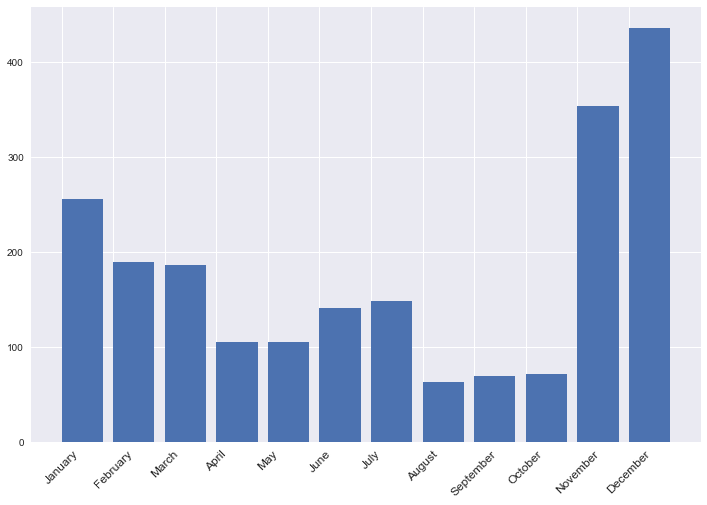

In [357]:
plt.figure(figsize=(12,8))
serie=tweet_df['month_sent'].value_counts()
serie=serie.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
serie
index=np.arange(len(serie))
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(index, labels, fontsize=12, rotation=45)
plt.bar(index,serie.values,align='edge')


In [316]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                 2127 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2127 non-null datetime64[ns]
source                   2127 non-null object
text                     2127 non-null object
expanded_urls            2127 non-null object
rating_numerator         2121 non-null object
rating_denominator       2121 non-null float64
name                     2127 non-null object
retweet_count            2124 non-null float64
favorite_count           2124 non-null float64
hashtags                 2124 non-null object
grade                    2121 non-null object
dog_stage                350 non-null object
month_sent               2127 non-null object
day_sent                 2127 non-null int64
hour_sent                2127 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(9)
m

Although I don't think I'll use this dataframe for visualizations or insights, I believe it would be more appropriate to consider each prediction as a separate observation. In other words, we should have a value/column named 'prediction' which will collate the existing `p1`,`p2`, and `p3` columns (the digits in the column names don't really give us any additional information - we can tell which prediction is more likely by looking at the `p_conf` columns).

This step will also involve collapsing the `p_conf` and `p_dog` columns.

Add: retweet_count,created_at,favorite_count

Cleaning:
1. Names: replace those starting with lowercase with 'None'
2. Ratings: normalize to denominator 10: multiply numerator by 10, divide by denominator 
3. Check to see if any dog categories were missed.
4. Remove rows that are retweets. Use any of the 'retweeted' columns to identify these (if any are left after merging?)

